In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/amit_/Downloads/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import SpectralClustering

# Encoding categorical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
encoded_data = data.copy()

# Encode categorical features
for feature in categorical_features:
    le = LabelEncoder()
    encoded_data[feature] = le.fit_transform(data[feature])

# Drop the target variable for clustering purposes
X = encoded_data.drop(columns=['NObeyesdad'])

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply spectral clustering
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
clusters = spectral_model.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters

# Display the first few rows of the dataframe with cluster labels
data.head()


C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0


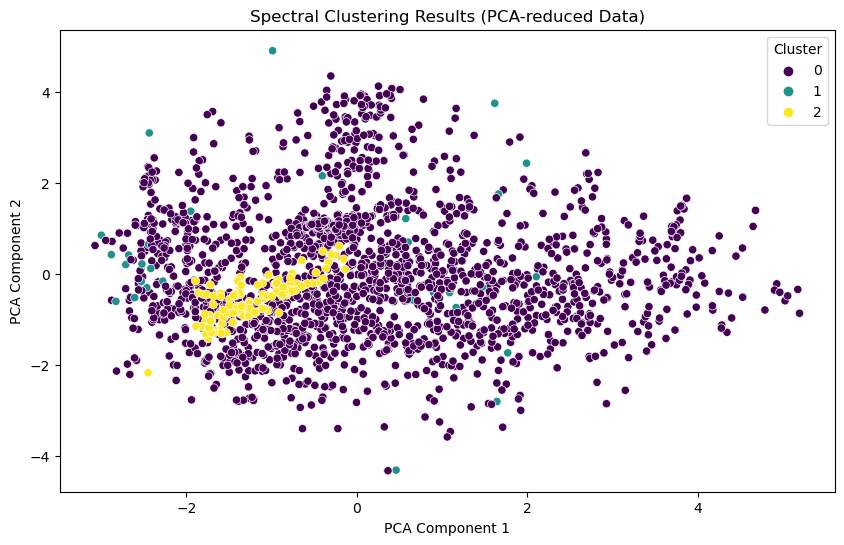

(Cluster
 0    1924
 2     143
 1      44
 Name: count, dtype: int64,
 NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
 Cluster                                                          
 0                           271            274             345   
 1                             1             13               6   
 2                             0              0               0   
 
 NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
 Cluster                                                             
 0                       282               180                 287   
 1                        15                 1                   3   
 2                         0               143                   0   
 
 NObeyesdad  Overweight_Level_II  
 Cluster                          
 0                           285  
 1                             5  
 2                             0  )

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Analysis 1: Cluster Distribution
cluster_counts = data['Cluster'].value_counts()

# Analysis 2: Cluster vs. Obesity Levels
cluster_obesity_crosstab = pd.crosstab(data['Cluster'], data['NObeyesdad'])

# Analysis 3: Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Spectral Clustering Results (PCA-reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

(cluster_counts, cluster_obesity_crosstab)


In [6]:
'''
Cluster 0: Largest and diverse, containing a mix of all obesity levels.
Cluster 1: Very small, with few normal weight and other categories.
Cluster 2: Distinctly captures Obesity_Type_III.
The spectral clustering model successfully identified a distinct cluster for severe obesity, 
but the other clusters are less clear-cut. 
This suggests that while spectral clustering can highlight some patterns, further tuning or different clustering techniques 
may be needed for more granular distinctions.

'''


'\nCluster 0: Largest and diverse, containing a mix of all obesity levels.\nCluster 1: Very small, with few normal weight and other categories.\nCluster 2: Distinctly captures Obesity_Type_III.\nThe spectral clustering model successfully identified a distinct cluster for severe obesity, \nbut the other clusters are less clear-cut. \nThis suggests that while spectral clustering can highlight some patterns, further tuning or different clustering techniques \nmay be needed for more granular distinctions.\n\n'

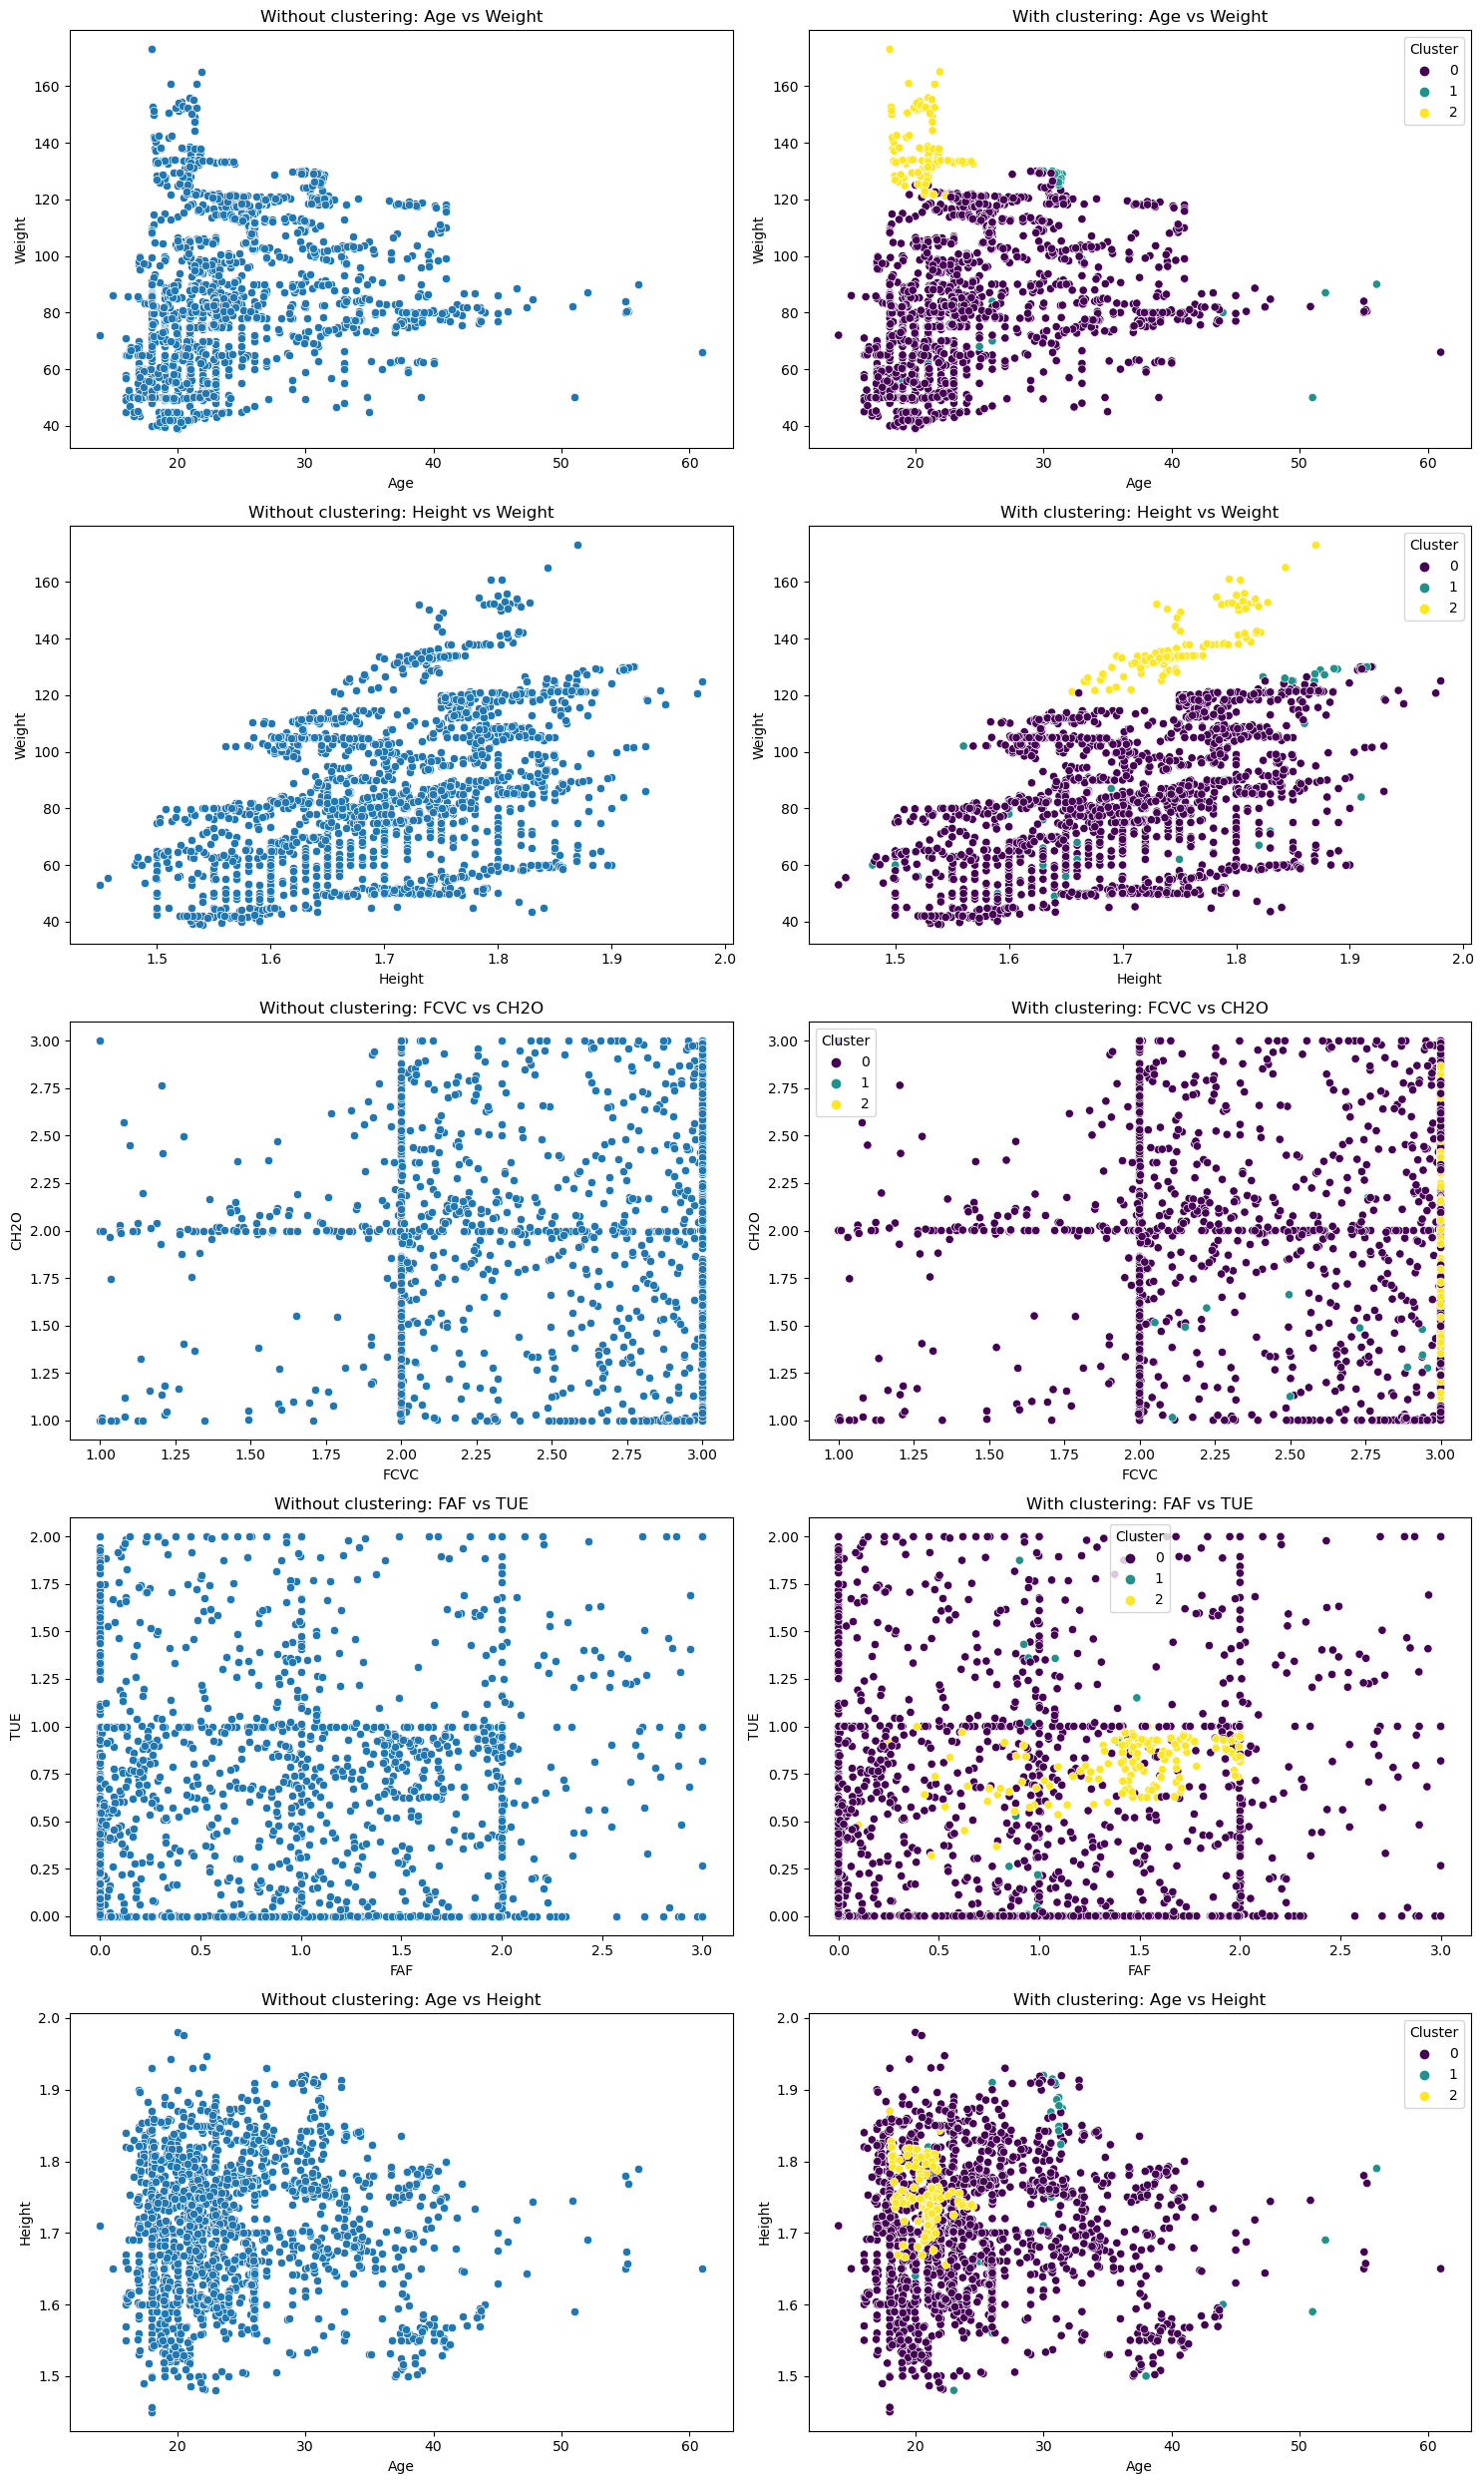

In [7]:

# Define the pairs of features for plotting
feature_pairs = [
    ('Age', 'Weight'),
    ('Height', 'Weight'),
    ('FCVC', 'CH2O'),
    ('FAF', 'TUE'),
    ('Age', 'Height')
]

# Create scatter plots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

for i, (feature_x, feature_y) in enumerate(feature_pairs):
    # Plot without clustering
    sns.scatterplot(ax=axes[i, 0], data=data, x=feature_x, y=feature_y).set_title(f'Without clustering: {feature_x} vs {feature_y}')
    # Plot with clustering
    sns.scatterplot(ax=axes[i, 1], data=data, x=feature_x, y=feature_y, hue='Cluster', palette='viridis').set_title(f'With clustering: {feature_x} vs {feature_y}')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import silhouette_score

# Range of cluster numbers to try
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    spectral_model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    clusters = spectral_model.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg:.2f}')


C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


For n_clusters = 2, the average silhouette_score is: 0.41


C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


For n_clusters = 3, the average silhouette_score is: 0.31


C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


For n_clusters = 4, the average silhouette_score is: 0.02


C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


For n_clusters = 5, the average silhouette_score is: 0.04


C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


For n_clusters = 6, the average silhouette_score is: 0.02


In [16]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

# Encode the true labels
true_labels = LabelEncoder().fit_transform(data['NObeyesdad'])

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])

# Adjusted Rand Index
ari = adjusted_rand_score(true_labels, data['Cluster'])

# Homogeneity, Completeness, V-measure
homogeneity = homogeneity_score(true_labels, data['Cluster'])
completeness = completeness_score(true_labels, data['Cluster'])
v_measure = v_measure_score(true_labels, data['Cluster'])

# Print the results
print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Adjusted Rand Index: {ari:.2f}')
print(f'Homogeneity Score: {homogeneity:.2f}')
print(f'Completeness Score: {completeness:.2f}')
print(f'V-measure Score: {v_measure:.2f}')


Silhouette Score: 0.17
Adjusted Rand Index: 0.02
Homogeneity Score: 0.08
Completeness Score: 0.43
V-measure Score: 0.13


In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Function to evaluate clustering
def evaluate_clustering(model, X, true_labels):
    clusters = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    ari = adjusted_rand_score(true_labels, clusters)
    homogeneity = homogeneity_score(true_labels, clusters)
    completeness = completeness_score(true_labels, clusters)
    v_measure = v_measure_score(true_labels, clusters)
    return clusters, silhouette_avg, ari, homogeneity, completeness, v_measure

# Encode the true labels
true_labels = LabelEncoder().fit_transform(data['NObeyesdad'])

# List of models to try
models = {
    'Spectral Clustering (3 clusters)': SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0),
    'KMeans (3 clusters)': KMeans(n_clusters=3, random_state=0),
    'Agglomerative Clustering (3 clusters)': AgglomerativeClustering(n_clusters=3)
}

# Evaluate each model
for model_name, model in models.items():
    clusters, silhouette_avg, ari, homogeneity, completeness, v_measure = evaluate_clustering(model, X_pca, true_labels)
    print(f'{model_name}:')
    print(f'  Silhouette Score: {silhouette_avg:.2f}')
    print(f'  Adjusted Rand Index: {ari:.2f}')
    print(f'  Homogeneity Score: {homogeneity:.2f}')
    print(f'  Completeness Score: {completeness:.2f}')
    print(f'  V-measure Score: {v_measure:.2f}')
    print()

# Evaluate different numbers of clusters for the best model
best_model_name = 'KMeans'
best_model_class = KMeans

for n_clusters in range(2, 6):
    model = best_model_class(n_clusters=n_clusters, random_state=0)
    clusters, silhouette_avg, ari, homogeneity, completeness, v_measure = evaluate_clustering(model, X_pca, true_labels)
    print(f'{best_model_name} with {n_clusters} clusters:')
    print(f'  Silhouette Score: {silhouette_avg:.2f}')
    print(f'  Adjusted Rand Index: {ari:.2f}')
    print(f'  Homogeneity Score: {homogeneity:.2f}')
    print(f'  Completeness Score: {completeness:.2f}')
    print(f'  V-measure Score: {v_measure:.2f}')
    print()


Spectral Clustering (3 clusters):
  Silhouette Score: 0.38
  Adjusted Rand Index: 0.06
  Homogeneity Score: 0.12
  Completeness Score: 0.30
  V-measure Score: 0.17



C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (3 clusters):
  Silhouette Score: 0.41
  Adjusted Rand Index: 0.08
  Homogeneity Score: 0.11
  Completeness Score: 0.20
  V-measure Score: 0.14

Agglomerative Clustering (3 clusters):
  Silhouette Score: 0.38
  Adjusted Rand Index: 0.06
  Homogeneity Score: 0.08
  Completeness Score: 0.15
  V-measure Score: 0.11



C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans with 2 clusters:
  Silhouette Score: 0.37
  Adjusted Rand Index: 0.09
  Homogeneity Score: 0.12
  Completeness Score: 0.36
  V-measure Score: 0.18



C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans with 3 clusters:
  Silhouette Score: 0.41
  Adjusted Rand Index: 0.08
  Homogeneity Score: 0.11
  Completeness Score: 0.20
  V-measure Score: 0.14



C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans with 4 clusters:
  Silhouette Score: 0.38
  Adjusted Rand Index: 0.09
  Homogeneity Score: 0.15
  Completeness Score: 0.21
  V-measure Score: 0.17



C:\Users\amit_\.conda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans with 5 clusters:
  Silhouette Score: 0.38
  Adjusted Rand Index: 0.10
  Homogeneity Score: 0.17
  Completeness Score: 0.21
  V-measure Score: 0.19

